# Dexian Data Analytics Technical Challenge

**Author:** James Meredith

Active Project Dates: Mar 15th, 2024 - Mar 22nd, 2024

***

![alt text](./images/company_logo.png)

## Abstract

This technical challenge aims to provide actionable insights from a dataset containing information on American colleges and universities. By applying advanced data analytics and engineering techniques, this project seeks to uncover trends and patterns that could assist a consulting firm in advising institutions of higher learning. Through meticulous data analysis, key insights regarding institutional types, acceptance rates, tuition fees, and graduation rates were discovered, enabling data-driven decision-making.

## Business Problem

The scenario for this technical challenge was as follows:

    You are working with a firm that provides consulting services for institutions of higher learning. The team has gathered some data about a number of schools, and they are hoping you can identify some meaningful insights that could help them as they advise various colleges and universities this year.

## The Data

The dataset for this challenge provides detailed information about various American colleges and universities, including public/private designation, application statistics, tuition fees, and graduation rates. The aim was to analyze this dataset to identify trends and insights that could inform strategic advice for higher education institutions.

The dataset used for this technical challenge can be found at the following: https://docs.google.com/spreadsheets/d/1rThcHm3ZATkhOtsGL6477nQaePrIzcsl/export

### Initial Exploration of The Dataset

Here we ingest the dataset using the Pandas library and perform an initial exploration of the dataset using Pandas, Matplotlib, and Seaborn:

In [37]:
# Ingest the dataset
import pandas as pd
filepath = './data/Universities.xlsx'
df = pd.read_excel(filepath,sheet_name='usnews3.data.9 .SS (v5.0)')

In [38]:
# Generate an overview of the data
df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [40]:
df.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,1302.000000,1292.000000,1291.000000,1297.000000,1067.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,981.000000,804.000000,1028.000000,1254.000000,1121.000000,1270.000000,1300.000000,1204.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316
std,0.480470,3541.974712,2250.866400,884.578274,18.312618,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,1150.836848,661.742099,469.379234,167.355386,714.247857,17.825627,5.186399,18.889058
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,695.750000,554.500000,236.000000,13.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,1710.000000,1619.250000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000
50%,2.000000,1470.000000,1095.000000,447.000000,21.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,2200.000000,1980.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,2.000000,3314.250000,2303.000000,984.000000,32.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,3040.000000,2401.500000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


In [41]:
# Identify missing values
missing_values = df.isnull().sum()
print(missing_values)

College Name                  0
State                         0
Public (1)/ Private (2)       0
# appli. rec'd               10
# appl. accepted             11
# new stud. enrolled          5
% new stud. from top 10%    235
% new stud. from top 25%    202
# FT undergrad                3
# PT undergrad               32
in-state tuition             30
out-of-state tuition         20
room                        321
board                       498
add. fees                   274
estim. book costs            48
estim. personal $           181
% fac. w/PHD                 32
stud./fac. ratio              2
Graduation rate              98
dtype: int64


In [42]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

College Name                 0.000000
State                        0.000000
Public (1)/ Private (2)      0.000000
# appli. rec'd               0.768049
# appl. accepted             0.844854
# new stud. enrolled         0.384025
% new stud. from top 10%    18.049155
% new stud. from top 25%    15.514593
# FT undergrad               0.230415
# PT undergrad               2.457757
in-state tuition             2.304147
out-of-state tuition         1.536098
room                        24.654378
board                       38.248848
add. fees                   21.044547
estim. book costs            3.686636
estim. personal $           13.901690
% fac. w/PHD                 2.457757
stud./fac. ratio             0.153610
Graduation rate              7.526882
dtype: float64


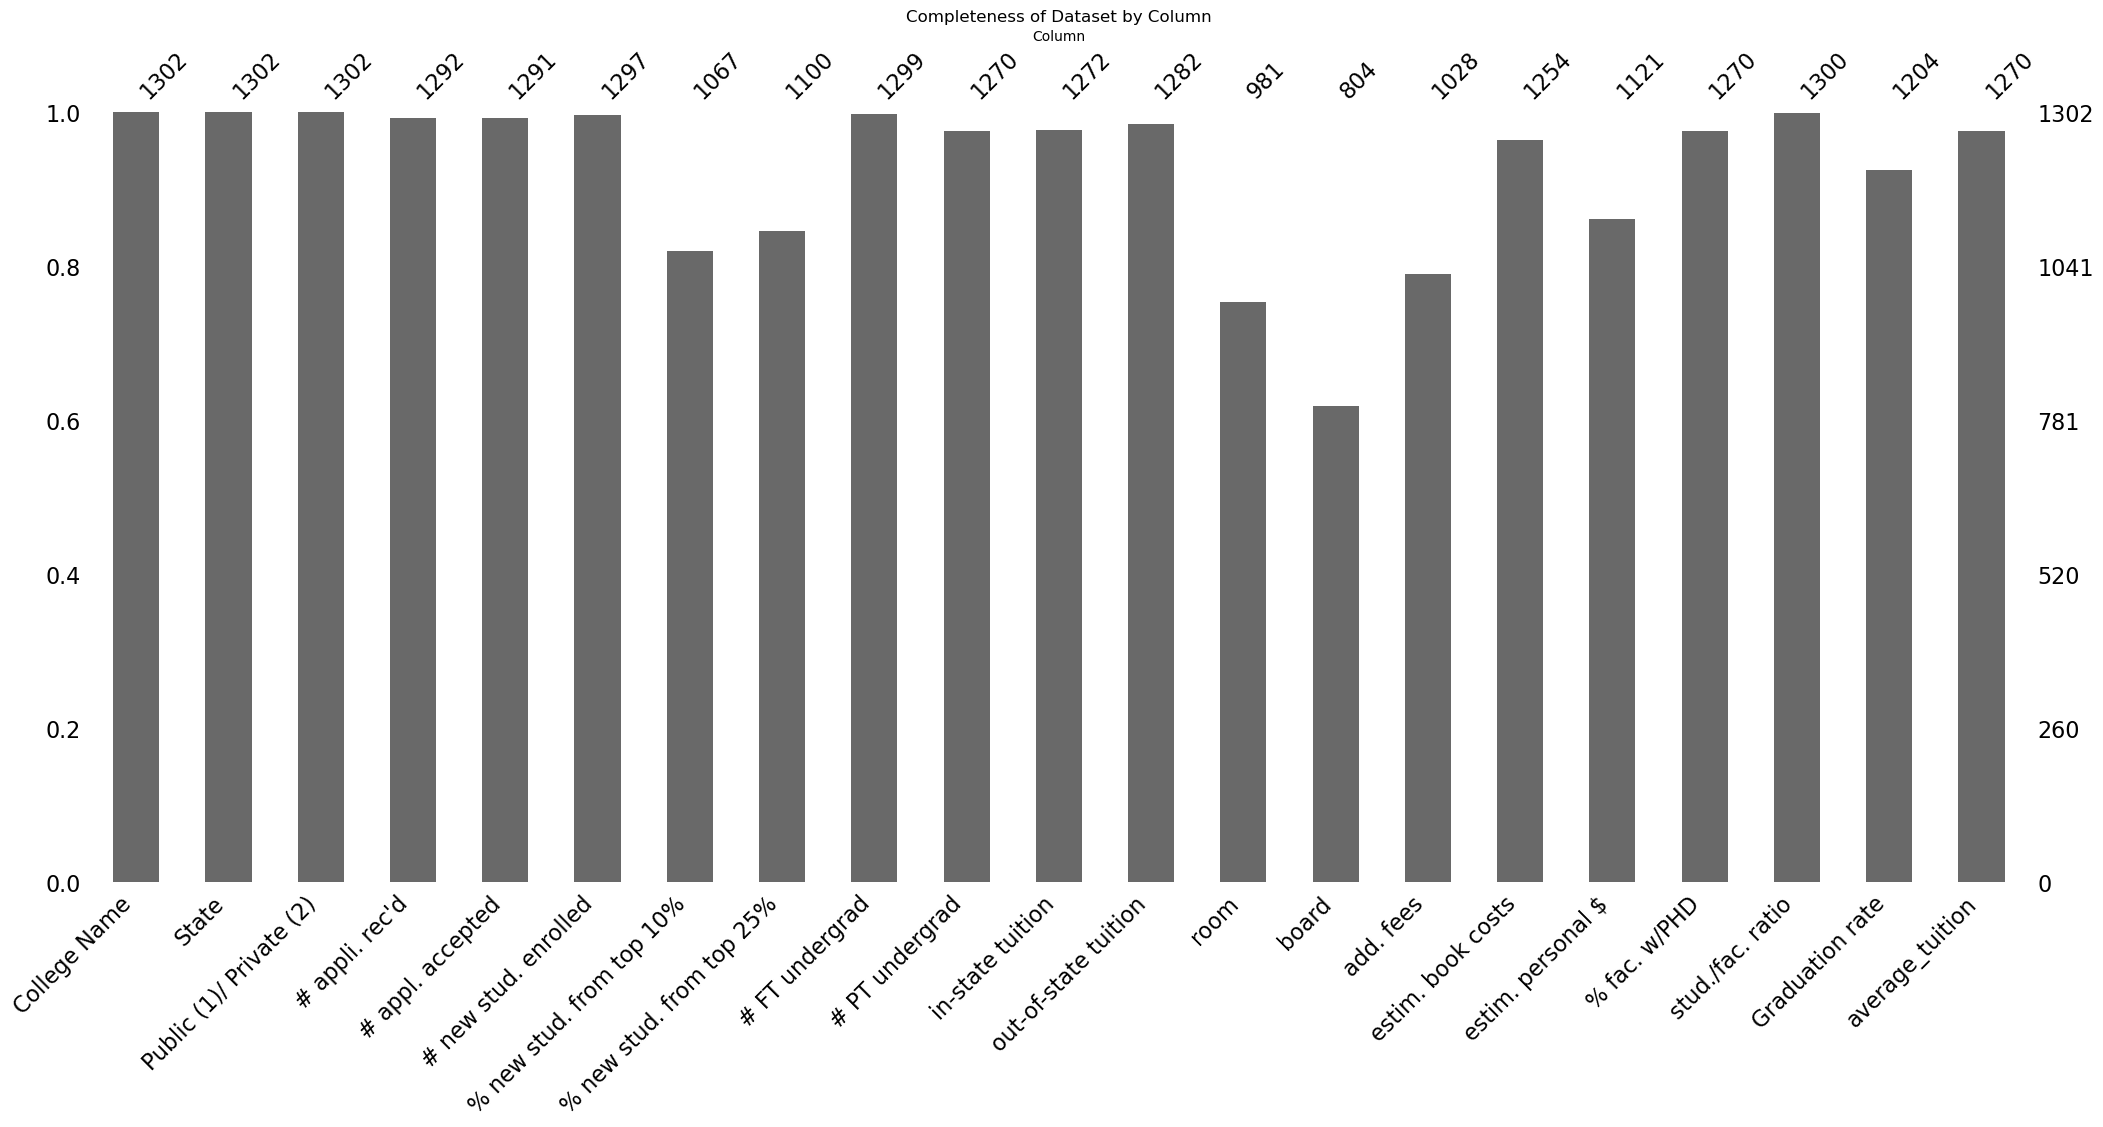

In [61]:
# Visualizing the completeness of the dataset
import missingno

msno.bar(df)
plt.title('Completeness of Dataset by Column')
plt.xlabel('Column')
plt.ylabel('Completeness (%)')

plt.show()

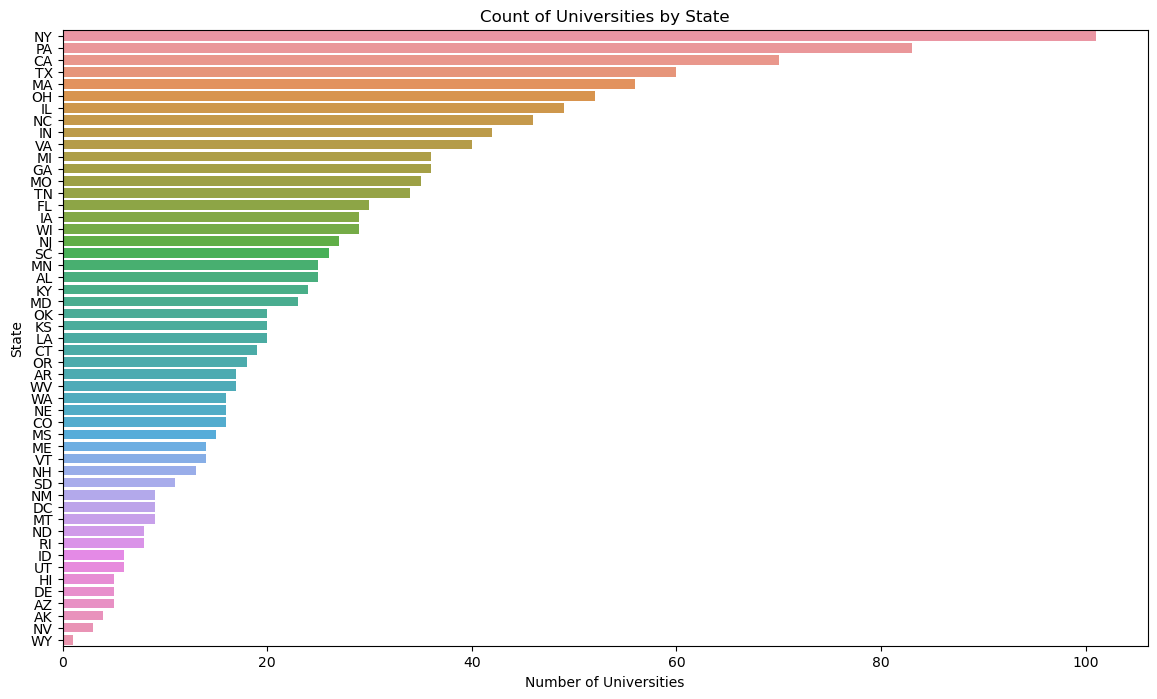

In [63]:
# Visualization: Distribution of Universities by State
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.countplot(y='State', data=df, order = df['State'].value_counts().index)
plt.title('Count of Universities by State')
plt.xlabel('Number of Universities')
plt.ylabel('State')
plt.show()

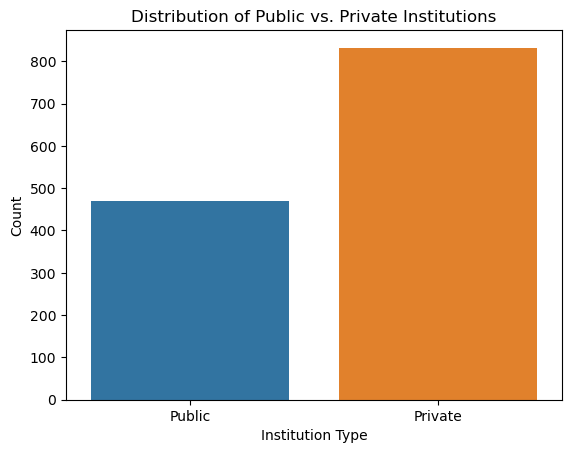

In [27]:
# Visualization: Distribution of public vs. private institutions
sns.countplot(x='Public (1)/ Private (2)', data=df)
plt.title('Distribution of Public vs. Private Institutions')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Count')
plt.show()

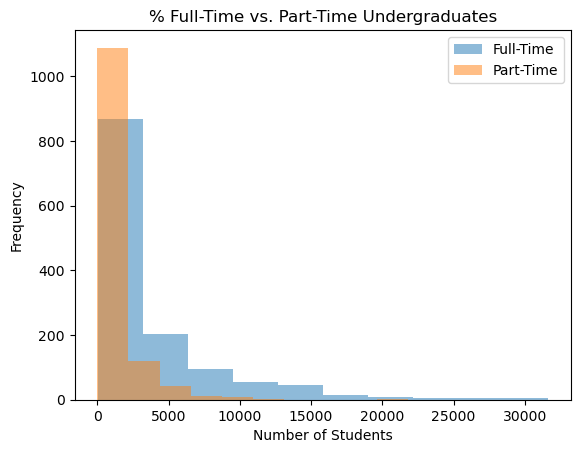

In [65]:
# Visualization: Distribution of Applications Recieved vs Accepted
plt.hist(df['# FT undergrad'], alpha=0.5, label='Full-Time')
plt.hist(df['# PT undergrad'], alpha=0.5, label='Part-Time')
plt.title('% Full-Time vs. Part-Time Undergraduates')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')
plt.legend()
plt.show()


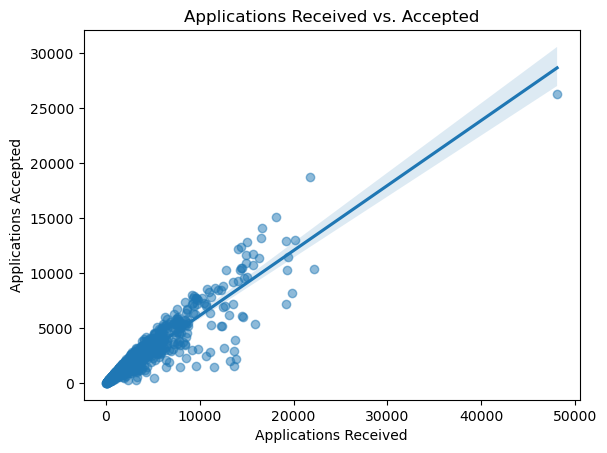

In [72]:
# Visualization: Distribution of Applications Recieved vs Accepted
sns.regplot(x='# appli. rec\'d', y='# appl. accepted', data=df, scatter_kws={'alpha':0.5})
plt.title('Applications Received vs. Accepted')
plt.xlabel('Applications Received')
plt.ylabel('Applications Accepted')
plt.show()

In [67]:
# Assuming 'top_10_group' and 'top_25_group' are existing categorical columns you've created
sns.barplot(x='top_10_group', y='Graduation rate', hue='top_25_group', data=df)
plt.title('Graduation Rate by % New from Top 10% and 25%')
plt.xlabel('Top 10% Group')
plt.ylabel('Graduation Rate')
plt.show()

ValueError: Could not interpret input 'top_10_group'

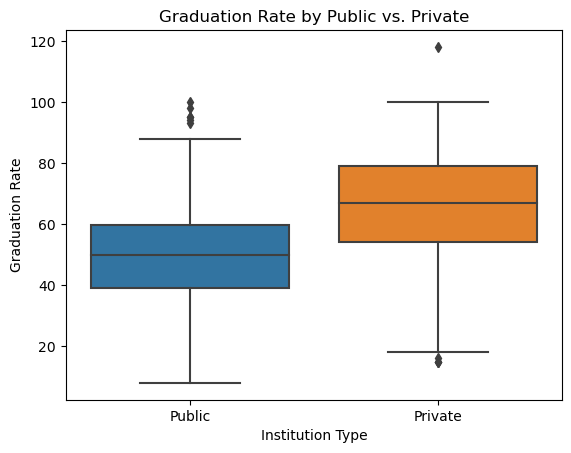

In [68]:
sns.boxplot(x='Public (1)/ Private (2)', y='Graduation rate', data=df)
plt.title('Graduation Rate by Public vs. Private')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Graduation Rate')
plt.show()

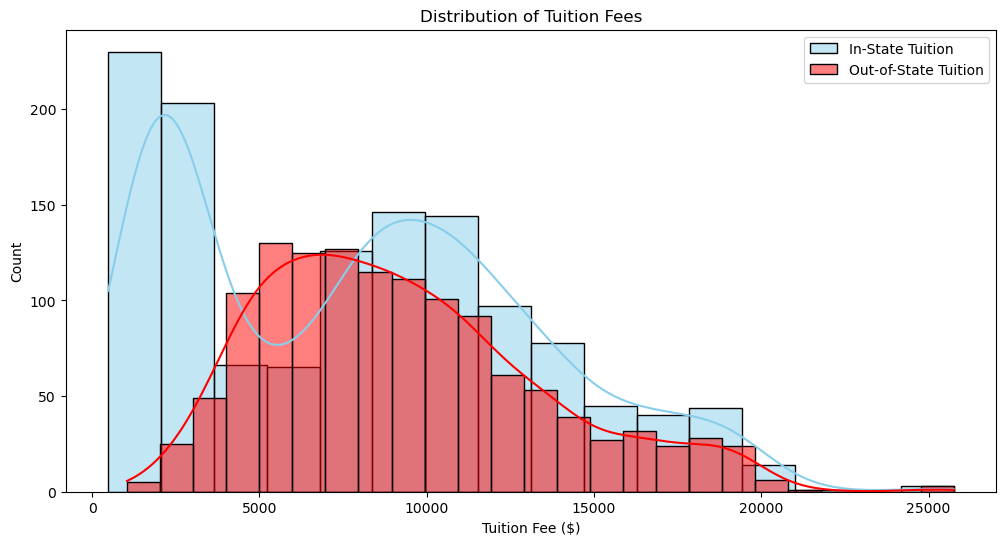

In [29]:
# Visualization: Distribution of Tuition Fees
plt.figure(figsize=(12, 6))
sns.histplot(df['in-state tuition'], kde=True, color='skyblue', label='In-State Tuition')
sns.histplot(df['out-of-state tuition'], kde=True, color='red', label='Out-of-State Tuition')
plt.title('Distribution of Tuition Fees')
plt.xlabel('Tuition Fee ($)')
plt.ylabel('Count')
plt.legend()
plt.show()

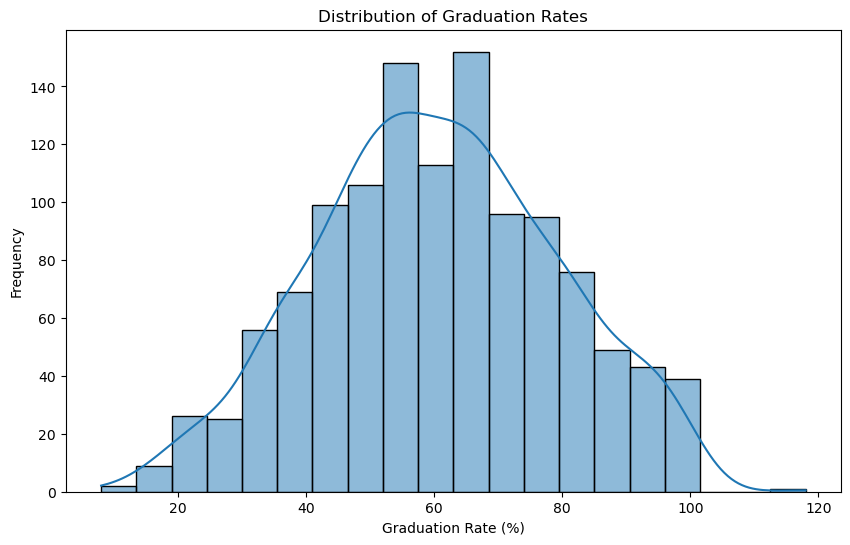

In [30]:
# Visualization: Distribution of Graduation Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Graduation rate'], bins=20, kde=True)
plt.title('Distribution of Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Frequency')
plt.show()

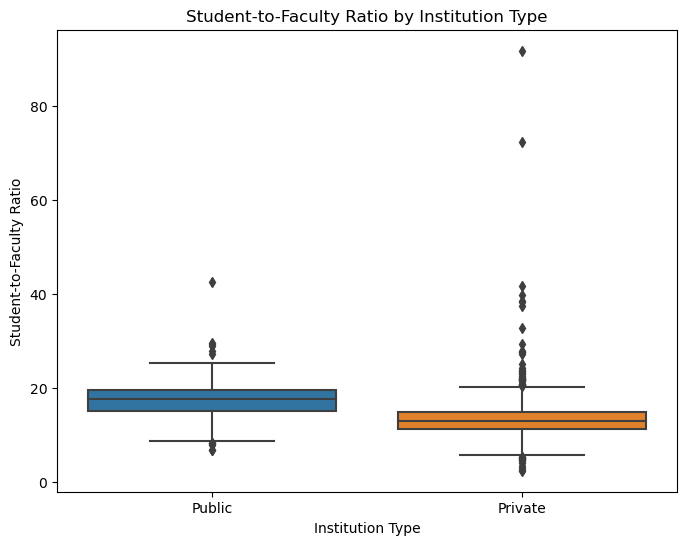

In [31]:
# Visualization: Student-to-Faculty Ratio by Institution Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Public (1)/ Private (2)', y='stud./fac. ratio', data=df)
plt.title('Student-to-Faculty Ratio by Institution Type')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Student-to-Faculty Ratio')
plt.show()

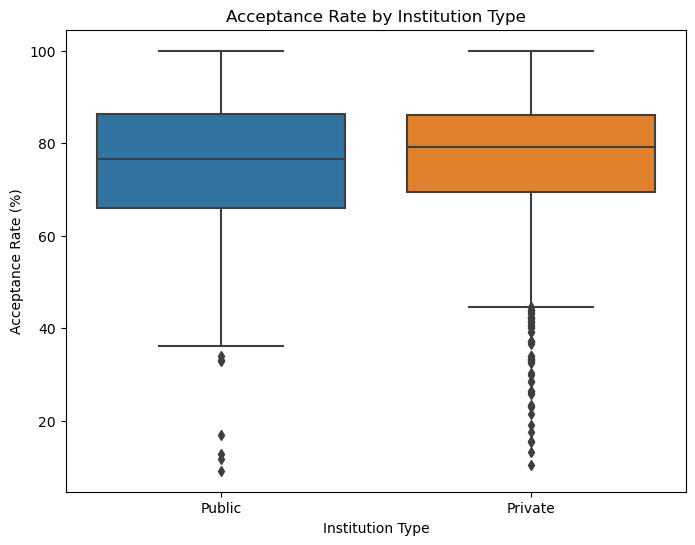

In [32]:
plt.figure(figsize=(8, 6))
df['acceptance_rate'] = (df['# appl. accepted'] / df['# appli. rec\'d']) * 100
sns.boxplot(x='Public (1)/ Private (2)', y='acceptance_rate', data=df)
plt.title('Acceptance Rate by Institution Type')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Acceptance Rate (%)')
plt.show()

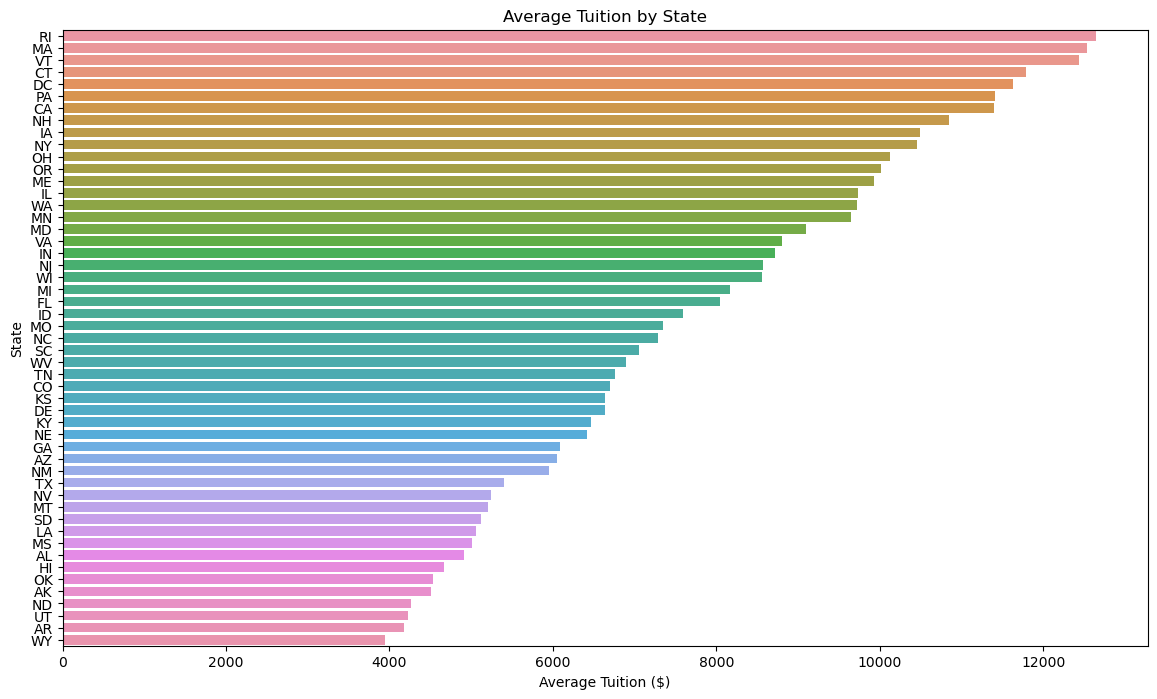

In [43]:
plt.figure(figsize=(14, 8))
df['average_tuition'] = (df['in-state tuition'] + df['out-of-state tuition']) / 2
state_tuition = df.groupby('State')['average_tuition'].mean().sort_values(ascending=False)
sns.barplot(x=state_tuition.values, y=state_tuition.index)
plt.title('Average Tuition by State')
plt.xlabel('Average Tuition ($)')
plt.ylabel('State')
plt.show()

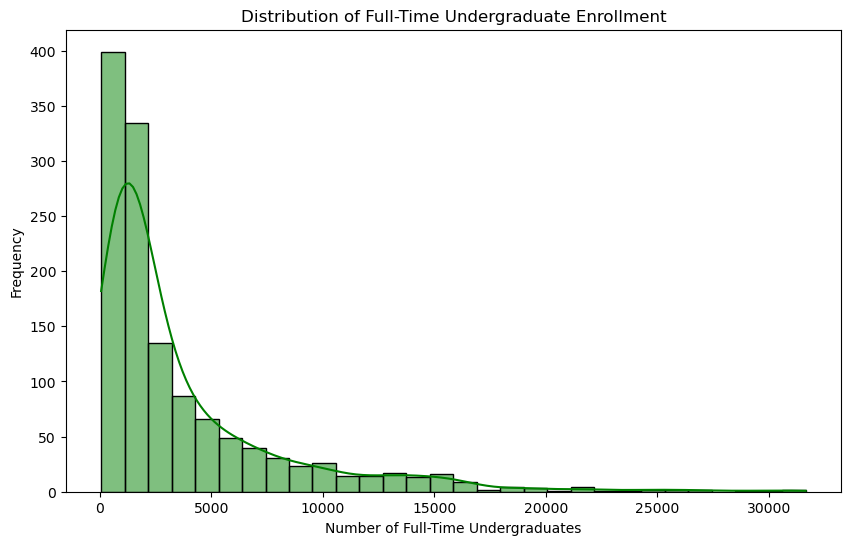

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['# FT undergrad'], bins=30, color='green', kde=True)
plt.title('Distribution of Full-Time Undergraduate Enrollment')
plt.xlabel('Number of Full-Time Undergraduates')
plt.ylabel('Frequency')
plt.show()

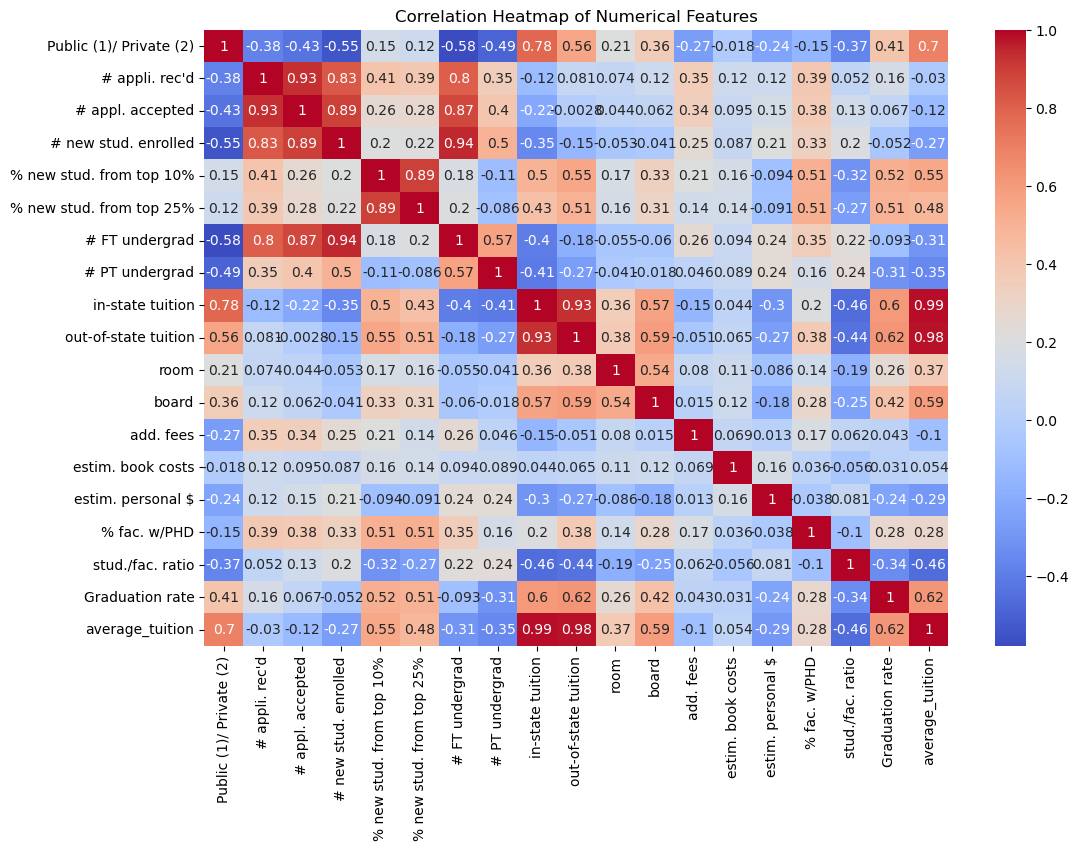

In [45]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

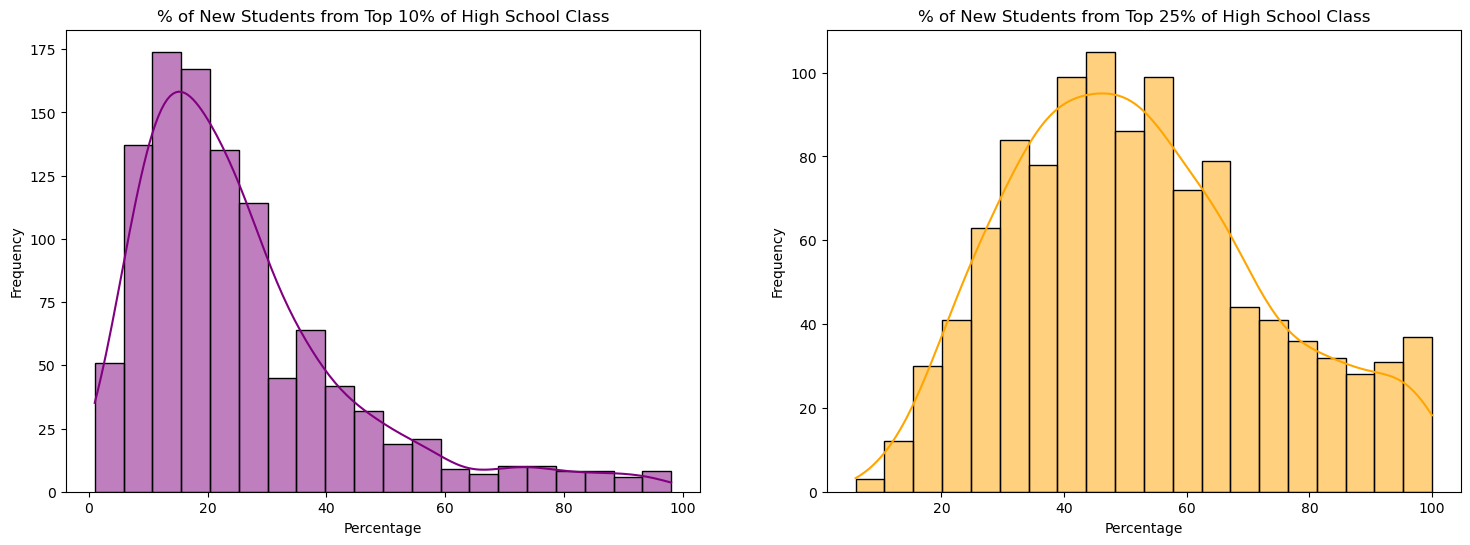

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(df['% new stud. from top 10%'], bins=20, ax=ax[0], color='purple', kde=True)
ax[0].set_title('% of New Students from Top 10% of High School Class')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('Frequency')

sns.histplot(df['% new stud. from top 25%'], bins=20, ax=ax[1], color='orange', kde=True)
ax[1].set_title('% of New Students from Top 25% of High School Class')
ax[1].set_xlabel('Percentage')
ax[1].set_ylabel('Frequency')
plt.show()

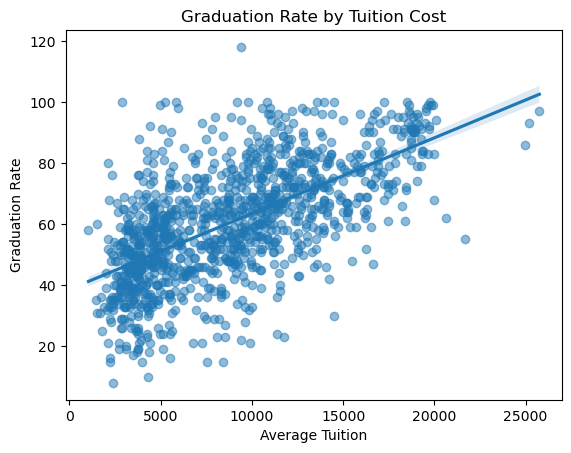

In [73]:
sns.regplot(x='average_tuition', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by Tuition Cost')
plt.xlabel('Average Tuition')
plt.ylabel('Graduation Rate')
plt.show()

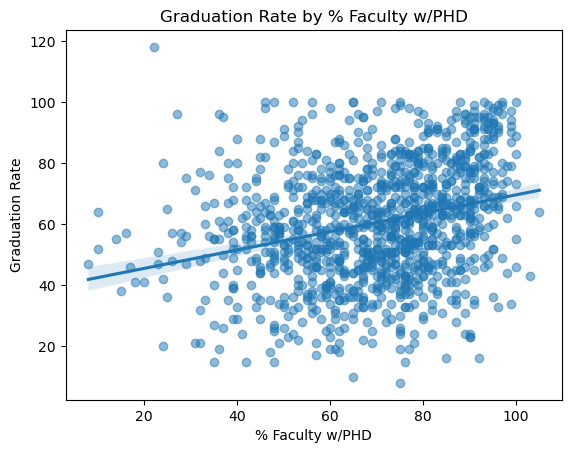

In [75]:
sns.regplot(x='% fac. w/PHD', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by % Faculty w/PHD')
plt.xlabel('% Faculty w/PHD')
plt.ylabel('Graduation Rate')
plt.show()

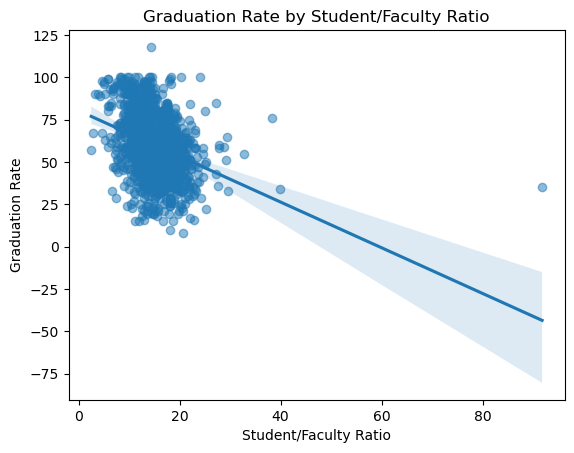

In [77]:
sns.regplot(x='stud./fac. ratio', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by Student/Faculty Ratio')
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Graduation Rate')
plt.show()


So the structure of the dataset is as follows:

- Dataset is 1302 rows (excluding headers) by 20 columns
- Dataset contains a mixture of data types (categorical and numeric)
- Dataset contains nulls, improperly formatted values, and unwieldy header names

## Data Cleaning

In [47]:
# Rename Columns
list(df.columns)
df.rename(columns={'Fly ash': 'FlyAsh', 'Coarse Aggr.': "CoarseAgg",
                    'Fine Aggr.': 'FineAgg', 'Air Entrainment': 'AirEntrain', 
                    'Compressive Strength (28-day)(Mpa)': 'Strength'}, inplace=True)
con.head()

['College Name',
 'State',
 'Public (1)/ Private (2)',
 "# appli. rec'd",
 '# appl. accepted',
 '# new stud. enrolled',
 '% new stud. from top 10%',
 '% new stud. from top 25%',
 '# FT undergrad',
 '# PT undergrad',
 'in-state tuition',
 'out-of-state tuition',
 'room',
 'board',
 'add. fees',
 'estim. book costs',
 'estim. personal $',
 '% fac. w/PHD',
 'stud./fac. ratio',
 'Graduation rate',
 'average_tuition']

In [15]:
# Example: Filling missing values for 'in-state tuition' with the median
df['in-state tuition'].fillna(df['in-state tuition'].median(), inplace=True)

# Alternatively, you might decide to drop rows with missing values in critical columns
# df.dropna(subset=['critical_column'], inplace=True)


Here is outlined the creation of the automated mood-labeling system. The system is a multi-class classification model that predicts the mood of a song based on its audio features. The purpose of the model is to automatically tag songs in the database to allow for easy filtering based on mood once integrated with the recommendation system. The songs appropriate for a user's mood are then used to create a recommendation list for the user, and those that are inappropriate are excluded.

## Results

## Recommendations

## Conclusion:

In conclusion, this project outlines the business problem of enhancing Spotify's recommendation system with context-specific music recommendations based on a user's mood. By integrating an automated mood detection algorithm, users will be able to effortlessly generate playlists that align with their emotional state at any given time. This project aims to provide a fully-working prototype, demonstrating the feasibility and value of such an enhancement. By addressing this business problem, Spotify can elevate its recommendation system to new heights and offer users a truly personalized music streaming experience.